In [52]:
! conda install pygraphviz -y

Channels:
 - defaults
 - conda-forge
 - anaconda
Platform: linux-64
Solving environment: done

## Package Plan ##

  environment location: /home/ebutz/miniconda3/envs/pyg

  added / updated specs:
    - pygraphviz


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    pygraphviz-1.9             |  py311h5eee18b_1         148 KB
    ------------------------------------------------------------
                                           Total:         148 KB

The following NEW packages will be INSTALLED:

  pygraphviz         pkgs/main/linux-64::pygraphviz-1.9-py311h5eee18b_1 



                                                                                
Preparing transaction: done
Verifying transaction: done
Executing transaction: done


In [40]:
! conda install colorspacious -y

Channels:
 - defaults
 - conda-forge
 - anaconda
Platform: linux-64
Solving environment: done

## Package Plan ##

  environment location: /home/ebutz/miniconda3/envs/pyg

  added / updated specs:
    - colorspacious


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    blas-1.0                   |         openblas          46 KB
    colorspacious-1.1.2        |  py311h92b7b1e_0          80 KB
    libgfortran-ng-11.2.0      |       h00389a5_1          20 KB
    libgfortran5-11.2.0        |       h1234567_1         2.0 MB
    libopenblas-0.3.21         |       h043d6bf_0         5.4 MB
    numpy-1.26.4               |  py311h24aa872_0          10 KB
    numpy-base-1.26.4          |  py311hbfb1bba_0         8.3 MB
    ------------------------------------------------------------
                                           Total:        15.9 MB

The following NEW packages will be INSTALLED:

  bl

In [44]:
import networkx as nx
import nxontology 
import matplotlib.pyplot as plt
import pydot
from colorspacious import cspace_converter

import matplotlib.pyplot as plt
import numpy as np

import matplotlib as mpl

from networkx.drawing.nx_pydot import graphviz_layout

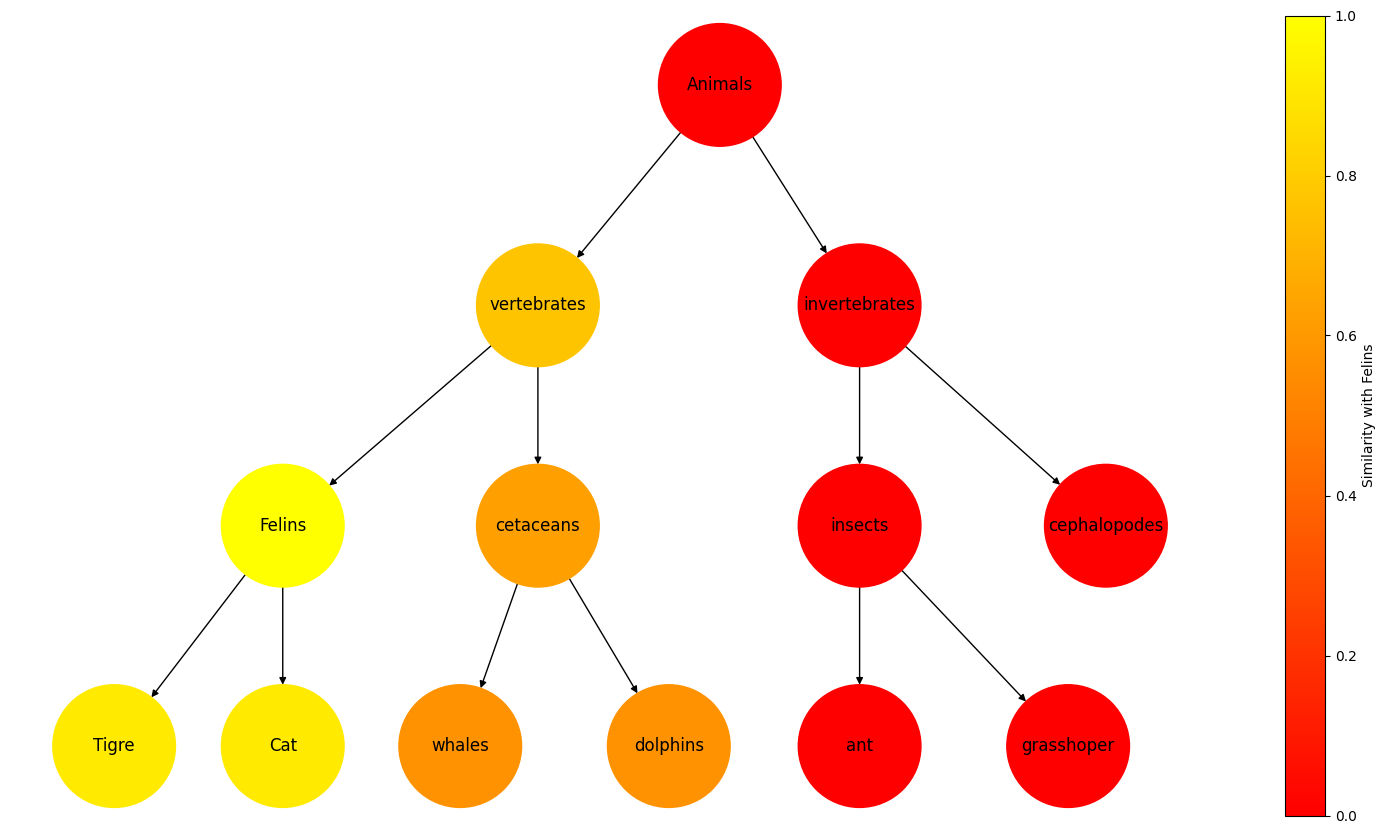

In [78]:
G = nx.DiGraph()
nodes = ['Animals', 
        'vertebrates', 'invertebrates',
        'Felins','cetaceans','insects', 'cephalopodes',
        'Tigre','Cat','whales','dolphins','ant','grasshoper']
[G.add_node(node) for node in nodes]

for i in range(len(nodes)):
    node = nodes[i]
    try : 
        child1 = nodes[(i+1)*2-1]
        child2 = nodes[(i+1)*2]
        G.add_edges_from([(node,child1),(node,child2)])
    except:
        pass

tree = nxontology.NXOntology(G)
node_colors = [tree.similarity('Felins',node).lin for node in nodes]

plt.figure(figsize=(15, 8))

pos = graphviz_layout(G, prog='dot')

colors = plt.cm.autumn
nx.draw(G, pos, with_labels=True, node_color=node_colors, cmap=colors, node_size=7800)

# Ajout de la barre de couleur
sm = plt.cm.ScalarMappable(cmap=colors, norm=plt.Normalize(min(node_colors), max(node_colors)))
sm.set_array([])
plt.colorbar(sm, label='Similarity with Felins', ax=plt.gca())
plt.show()